In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

In [100]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
df = pd.read_csv('data06.csv', delimiter = ';', names = ['I', 'II', 'classification'])
df

,I,II,classification
0,0.009,0.933,0
1,0.948,0.108,1
2,0.178,0.201,0
3,0.663,0.379,1
4,0.712,0.279,1
...,...,...,...
95,0.147,0.471,0
96,0.620,0.568,1
97,0.137,0.759,0
98,0.070,0.492,0


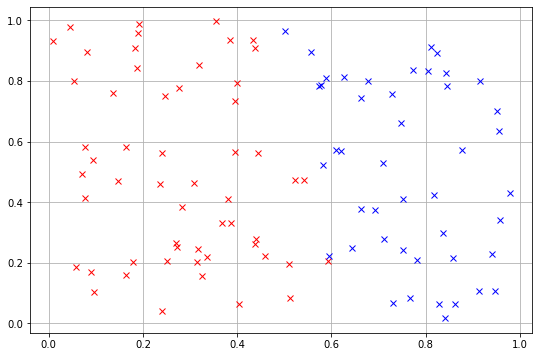

In [102]:
plt.subplots(figsize = (9, 6))
plt.plot(df[df['classification'] == 0]['I'], df[df['classification'] == 0]['II'], 'bx', color = 'red')
plt.plot(df[df['classification'] == 1]['I'], df[df['classification'] == 1]['II'], 'bx')
plt.grid()
plt.show()

In [103]:
X = [[float(df['I'][i]), float(df['II'][i])] for i in range(len(df))]
x_train, x_test, y_train, y_test = train_test_split(X, df['classification'].values, train_size = 0.75)
model = Perceptron().fit(x_train, y_train)
y_pred = model.predict(x_test)

In [104]:
pd.DataFrame({'true': y_test, 'predicted': y_pred})

,true,predicted
0,1,1
1,0,0
2,1,0
3,1,1
4,0,0
5,1,1
6,1,1
7,0,0
8,0,0
9,0,0


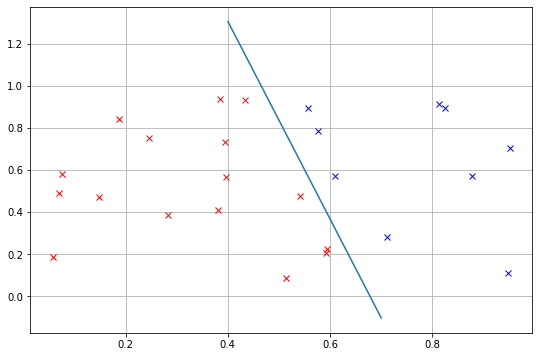

accuracy =  0.96


In [105]:
def f(x):
    return -(x*model.coef_[0][0] + model.intercept_[0])/model.coef_[0][1]

def points(x, y, caterogy):
    resx, resy = [], []
    for i in range(len(x)):
        if y[i] == caterogy:
            resx.append(x[i][0])
            resy.append(x[i][1])
    return resx, resy

plt.subplots(figsize = (9, 6))
plt.plot(points(x_test, y_pred, 0)[0], points(x_test, y_pred, 0)[1], 'bx', color = 'red')
plt.plot(points(x_test, y_pred, 1)[0], points(x_test, y_pred, 1)[1], 'bx')
x = np.linspace(0.4, 0.7)
plt.plot(x, f(x))
plt.grid()
plt.show()
print('accuracy = ', accuracy_score(y_pred, y_test))

# Part 2

In [106]:
df2 = pd.read_csv('heart.csv', delimiter = ',')
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [107]:
names = {'cp':'chest pain type', 
        'trestbps':'resting blood pressure',
        'chol': 'serum cholestoral in mg/dl', 
        'fbs':'fasting blood sugar > 120 mg/dl',
         'restecg':'resting electrocardiographic results', 
        'thalach':'maximum heart rate achieved',
        'exang':'exercise induced angina', 
        'oldpeak':'ST depression induced by exercise relative to rest',
        'slope':'the slope of the peak exercise ST segment', 
        'ca':'number of major vessels colored by flourosopy',
        'thal': 'thal'}

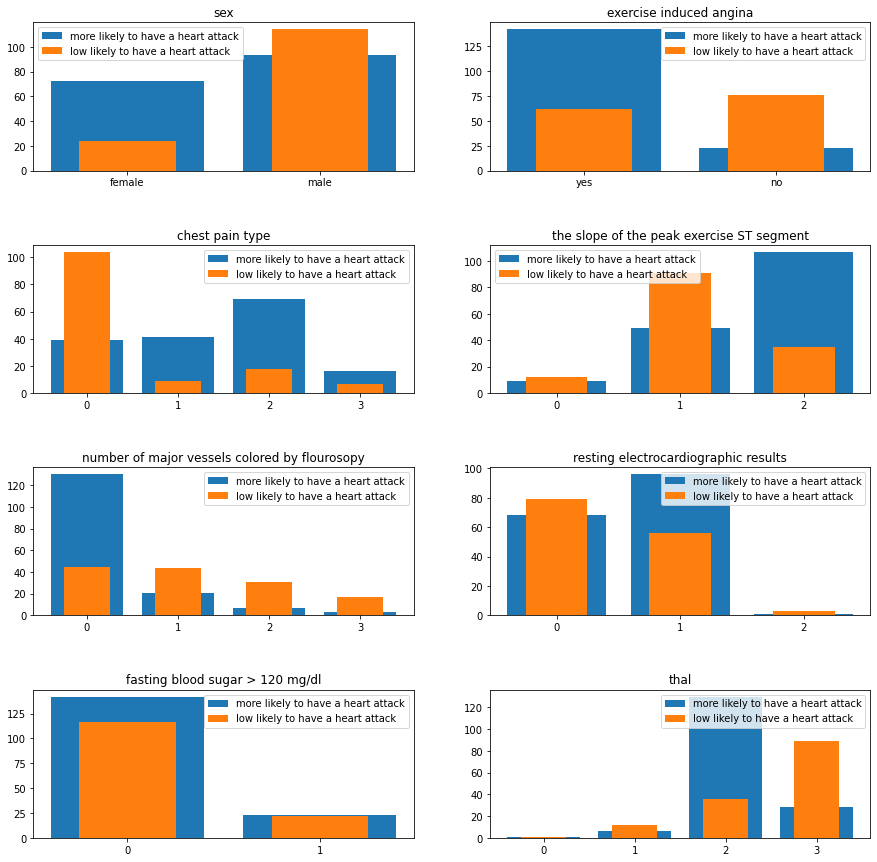

In [108]:
df2_1, df2_0 = df2[df2['target'] == 1], df2[df2['target'] == 0]
category_variables = ('cp', 'slope','ca', 'restecg','fbs', 'thal')
plt.figure(figsize = (15, 15))
plt.subplot(4, 2, 1)
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
x = ['female', 'male']
plt.title('sex')
plt.bar(x, [len(df2_1[df2_1['sex'] == k]) for k in (0, 1)], label = 'more likely to have a heart attack')
plt.bar(x, [len(df2_0[df2_0['sex'] == k]) for k in (0, 1)], width = 0.5, label = 'low likely to have a heart attack')
plt.legend()
plt.subplot(4, 2, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
x = ['yes', 'no']
plt.title(names['exang'])
plt.bar(x, [len(df2_1[df2_1['exang'] == k]) for k in (0, 1)], label = 'more likely to have a heart attack')
plt.bar(x, [len(df2_0[df2_0['exang'] == k]) for k in (0, 1)], width = 0.5, label = 'low likely to have a heart attack')
plt.legend()
x = ['0', '1', '2', '3']
for i in range(len(category_variables)):
    plt.subplot(4, 2, i + 3)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    plt.title(names[category_variables[i]])
    y_1 = [len(df2_1[df2_1[category_variables[i]]==k]) for k in range(4)]
    y_0 = [len(df2_0[df2_0[category_variables[i]]==k]) for k in range(4)]
    if (y_1[-1] == 0 and y_1[-2] == 0) or (y_0[-1] == 0 and y_0[-2] == 0):
        plt.bar(x[:-2], y_1[:-2], label = 'more likely to have a heart attack')
        plt.bar(x[:-2], y_0[:-2], width = 0.5, label = 'low likely to have a heart attack')
    elif y_1[-1] == 0 or y_0[-1] == 0:
        plt.bar(x[:-1], y_1[:-1], label = 'more likely to have a heart attack')
        plt.bar(x[:-1], y_0[:-1], width = 0.5, label = 'low likely to have a heart attack')
    else:
        plt.bar(x, y_1, label = 'more likely to have a heart attack')
        plt.bar(x, y_0, width = 0.5, label = 'low likely to have a heart attack')
    plt.legend()

In [109]:
df2 = df2[(df2['thal'] > 0) & (df2['restecg'] < 2)].copy()

In [110]:
if not df2.isnull().any().any(): 
    print('No missing data')

No missing data


In [111]:
df2_norm = df2.copy()
quantitative_variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
s = StandardScaler().fit_transform(df2.loc[:, quantitative_variables])
df2_norm[quantitative_variables] = StandardScaler().fit_transform(df2[quantitative_variables])
df2_norm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.960624,1,3,0.773322,-0.257416,1,0,-0.002805,0,1.119202,0,0,1,1
1,-1.906766,1,2,-0.087750,0.071620,0,1,1.619575,0,2.168896,0,0,2,1
2,-1.465629,0,1,-0.087750,-0.818714,0,0,0.961853,0,0.331932,2,0,2,1
3,0.188634,1,1,-0.661798,-0.199351,0,1,1.224942,0,-0.192915,2,0,2,1
4,0.298919,0,0,-0.661798,2.084550,0,1,0.567220,1,-0.367864,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.298919,0,0,0.486298,-0.102575,0,1,-1.186704,1,-0.717762,1,0,3,0
299,-1.024492,1,3,-1.235846,0.342592,0,1,-0.792071,0,0.156983,1,0,3,0
300,1.512045,1,0,0.715917,-1.031620,1,1,-0.397438,0,2.081421,1,2,3,0
301,0.298919,1,0,-0.087750,-2.231635,0,1,-1.537489,1,0.156983,1,1,3,0


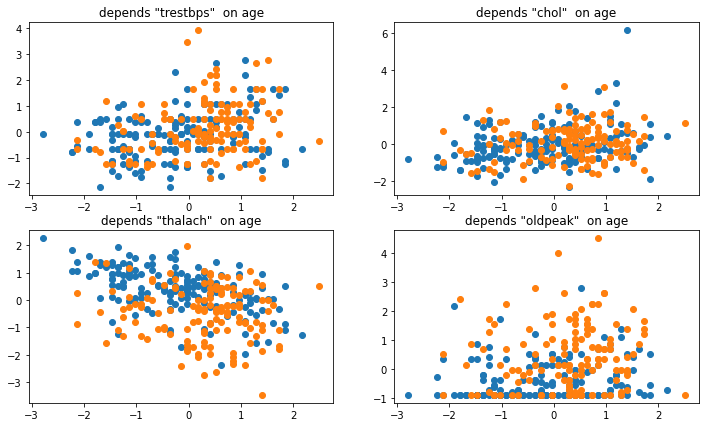

In [112]:
plt.figure(figsize=(12, 7))
for i in range(len(quantitative_variables[1:])):
    plt.subplot(2, 2, i + 1)
    plt.title(f'depends "{quantitative_variables[1:][i]}"  on age')
    plt.scatter(df2_norm[df2_norm['target'] == 1]['age'], df2_norm[df2_norm['target'] == 1][quantitative_variables[1:][i]])
    plt.scatter(df2_norm[df2_norm['target'] == 0]['age'], df2_norm[df2_norm['target'] == 0][quantitative_variables[1:][i]])

In [113]:
for title in quantitative_variables[1:]:
    df2_norm[title] = df2_norm[title].apply(lambda x: np.mean(abs(df2_norm[title])) if abs(x) > 3 else x)

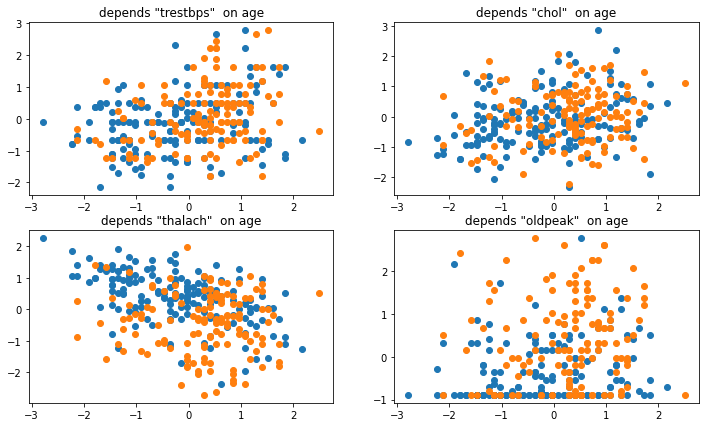

In [114]:
plt.figure(figsize=(12, 7))
for i in range(len(quantitative_variables[1:])):
    plt.subplot(2, 2, i + 1)
    plt.title(f'depends "{quantitative_variables[1:][i]}"  on age')
    plt.scatter(df2_norm[df2_norm['target'] == 1]['age'], df2_norm[df2_norm['target'] == 1][quantitative_variables[1:][i]])
    plt.scatter(df2_norm[df2_norm['target'] == 0]['age'], df2_norm[df2_norm['target'] == 0][quantitative_variables[1:][i]])

In [115]:
x_train, x_test, y_train, y_test = train_test_split(df2_norm.iloc[:,:-1].values, df2_norm['target'].values, train_size = 0.85)

In [116]:
clf = MLPClassifier(solver = 'sgd', hidden_layer_sizes = (104, 52), max_iter = 1000).fit(x_train, y_train)
y_pred = clf.predict(x_test)
pd.DataFrame({'true': y_test, 'predicted': y_pred})
print('accuracy = ', accuracy_score(y_test, y_pred))

accuracy =  0.7777777777777778
